### Visualization 1 - Visualize graph features

Choose a graph to print (enter 'Citation' or 'Collaboration'): collaboration
+-----------------------------+-----------------+
| Feature                     |           Value |
+=============================+=================+
| Number of nodes             | 14195           |
+-----------------------------+-----------------+
| Number of edges             | 39612           |
+-----------------------------+-----------------+
| Density                     |     0.000393203 |
+-----------------------------+-----------------+
| Average degree of the graph |     5.58112     |
+-----------------------------+-----------------+
| Is dense?                   |     0           |
+-----------------------------+-----------------+


Graph hubs                                                                                                                                                                                                                                                 => [2106222798, 2099

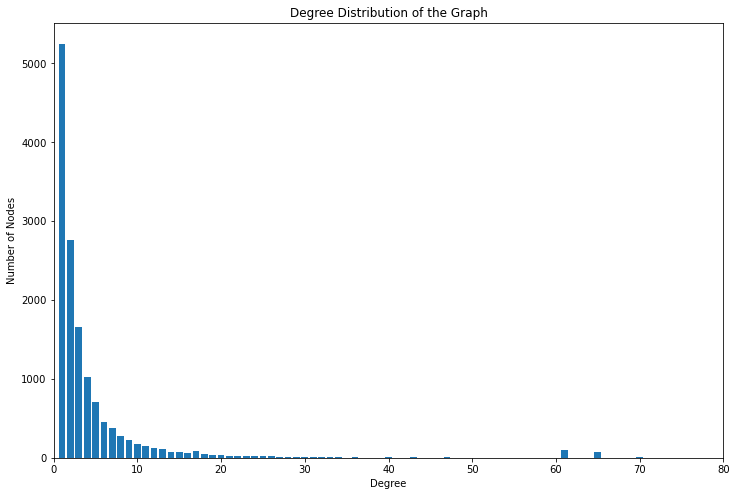

In [77]:
from tabulate import tabulate
import matplotlib.pyplot as plt

# Prompt the user for input
graph_choice = input("Choose a graph to print (enter 'Citation' or 'Collaboration'): ")

# Call the graph_features function on the chosen graph
if graph_choice.lower() == "citation":
    graph_features_dict = graph_features(citation_graph_nx, "Citation")
elif graph_choice.lower() == "collaboration":
    graph_features_dict = graph_features(collaboration_graph_nx, "Collaboration")
else:
    print("Invalid input. Please enter 'Citation' or 'Collaboration'.")

# Print the graph features in a table
print(tabulate([(k, v) for k, v in graph_features_dict.items() if k != "Degree distribution" and k != "Graph hubs"], headers=["Feature", "Value"], tablefmt='grid'))
print("\n")

# Print a table that lists the graph's hubs
for k, v in graph_features_dict.items():
    if k == "Graph hubs":
        print(f'{str(k)[:250]:250} => {str(v)[:250]:250}...]')

# Print A plot depicting the distribution of the citations received by papers
if graph_choice.lower() == "citation":
    for k, v in graph_features_dict.items():
        if k == "Degree distribution":
            degree_distribution_citation_in = v[0]
            plt.figure(figsize=(12, 8))
            plt.bar(degree_distribution_citation_in[1][:-1], degree_distribution_citation_in[0])
            plt.xlabel('In-Degree')
            plt.ylabel('Frequency')
            plt.title('In-Degree Distribution')
            plt.xlim(0, 60)
            plt.show()
            #Print A plot depicting the distribution of the given citations by papers
            degree_distribution_citation_out = v[1]
            plt.figure(figsize=(12, 8))
            plt.bar(degree_distribution_citation_out[1][:-1], degree_distribution_citation_out[0])
            plt.xlabel('Out-Degree')
            plt.ylabel('Frequency')
            plt.title('Out-Degree Distribution')
            plt.xlim(0, 60)
            plt.show()
            
        
# Print a plot depicting the number of collaborations of the author 
if graph_choice.lower() == "collaboration":
    for k, v in graph_features_dict.items():
        if k == "Degree distribution":
            degrees = list(range(len(v)))
            plt.figure(figsize=(12, 8))
            plt.bar(degrees, v)
            plt.xlabel('Degree')
            plt.ylabel('Number of Nodes')
            plt.title('Degree Distribution of the Graph')
            plt.xlim(0, 80)
            plt.show()

### Comment on the results:

In our query we checked the Collaboration Graph's features:  
We can see that most of the authors doesnt collabirate with more than 10 colleages,  
and even more precisely, the vast majority of writers work alone or with only one other person.

Note: we limited the number of nodes for 'Graph hub' to 20 in oredr to improve the visualization.

### Visualization 2 - Visualize the node's contribution

In [84]:
# Prompt the user for input
graph_choice = input("Choose a graph to print (enter 'Citation' or 'Collaboration'): ")
node = int(input("Choose a node to analyze: "))

# Call the graph_features function on the chosen graph
if graph_choice.lower() == "citation":
    graph_centrality_analysis = centrality_analysis(citation_graph_nx, node, "Citation")
elif graph_choice.lower() == "collaboration":
    graph_centrality_analysis = centrality_analysis(collaboration_graph_nx, node, "Collaboration")
else:
    print("Invalid input. Please enter 'Citation' or 'Collaboration'.")

#Print a table containing the node's centrality value based on the four centrality measurements
print(tabulate([(k, v) for k, v in graph_centrality_analysis.items()], headers=["Centrality Measurements", "Value"], tablefmt='grid'))

Choose a graph to print (enter 'Citation' or 'Collaboration'): collaboration
Choose a node to analyze: 2295564484
+---------------------------+------------------------+
| Centrality Measurements   | Value                  |
+===========================+========================+
| Graph Name                | Collaboration          |
+---------------------------+------------------------+
| Betweenness Centrality    | 0.0007964117138711971  |
+---------------------------+------------------------+
| PageRank Centrality       | 0.00030221995199759084 |
+---------------------------+------------------------+
| Closeness Centrality      | 0.06248530109916605    |
+---------------------------+------------------------+
| Degree Centrality         | 0.01747217134000282    |
+---------------------------+------------------------+


### Comment on the results:

In our query we checked the various centrality measurements for paper with ID: 2295564484